<a href="https://colab.research.google.com/github/manjunath1005/Data_Analysis/blob/main/Amazon_products_DataAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

**Task 1** — Load & Inspect the Dataset

Load the dataset into your notebook.

Display first and last 5 rows.

Print .shape and .info().

Show list of unique product categories.

Identify columns that require cleaning or type conversion.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
path="/content/drive/MyDrive/Colab Notebooks/amazon_products_dataset.csv"
df=pd.read_csv(path)

In [ ]:
df.head()

,title,brand,category,actual_price,discount_price,rating,rating_count
0,Smart Fitness Watch,Dell,Laptop,69890.0,65271.0,2.6,2128.0
1,Laptop with SSD Storage,LG,Smartwatch,66771.0,63977.0,2.5,9118.0
2,High Resolution Monitor,Mi,Headphones,43598.0,39679.0,1.9,2517.0
3,4K Action Camera,HP,Camera,63408.0,58877.0,3.7,17533.0
4,Smart Fitness Watch,Samsung,Monitor,49224.0,45017.0,4.9,14228.0


In [ ]:
df.tail()

,title,brand,category,actual_price,discount_price,rating,rating_count
1995,Smartphone with AMOLED Display,Dell,Monitor,24140.0,20202.0,3.0,16058.0
1996,Smart Fitness Watch,LG,Headphones,65449.0,64559.0,1.1,6655.0
1997,4K Action Camera,Dell,Smartphone,21358.0,18654.0,3.7,5308.0
1998,Noise Cancelling Earbuds,OnePlus,Smartwatch,35229.0,31061.0,2.2,19105.0
1999,Smartphone with AMOLED Display,Boat,Headphones,31662.0,31047.0,3.2,1064.0


In [ ]:
df.shape

(2000, 7)

In [ ]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           2000 non-null   object 
 1   brand           2000 non-null   object 
 2   category        1998 non-null   object 
 3   actual_price    1998 non-null   float64
 4   discount_price  1999 non-null   float64
 5   rating          1996 non-null   float64
 6   rating_count    1996 non-null   float64
dtypes: float64(4), object(3)
memory usage: 109.5+ KB
None


In [ ]:
df.dtypes

,0
title,object
brand,object
category,object
actual_price,float64
discount_price,float64
rating,float64
rating_count,float64


In [ ]:
df['category'].unique()

array(['Laptop', 'Smartwatch', 'Headphones', 'Camera', 'Monitor',
       'Speaker', 'Tablet', 'Smartphone', nan], dtype=object)

**Task 2** — Clean the Dataset

Identify missing values using .isnull().sum().

Fill missing numeric values (discount_price, rating, etc.) using mean or median.

Fill missing categorical values (brand, category) with "Unknown".

Remove all duplicate rows.

Convert numeric columns to their correct data types.

Reset index after cleaning.


In [ ]:
sample=df.copy()

In [ ]:
sample.isnull().sum()

,0
title,0
brand,0
category,2
actual_price,2
discount_price,1
rating,4
rating_count,4


In [ ]:
sample=sample.dropna(subset=['actual_price'])

In [ ]:
sample['discount_price']=sample.discount_price.fillna(0)

In [ ]:
sample['category']=sample.category.fillna('Unknown')
sample['rating']=sample.rating.fillna(0)
sample['rating_count']=sample.rating_count.fillna(0)

In [ ]:
sample.isnull().sum()

,0
title,0
brand,0
category,0
actual_price,0
discount_price,0
rating,0
rating_count,0


In [ ]:
sample.drop_duplicates(inplace=True)

In [ ]:
sample.shape

(1998, 7)

In [ ]:
sample.reset_index(drop=True,inplace=True)

**Task 3** — Data Analysis

Identify the top 5 most expensive products (actual_price).

Find the brand with the highest number of products.

Compute the average discount percentage for each brand.

Identify products with rating ≥ 4.5 and rating_count ≥ 2000.

Compute category-wise average price.

In [ ]:
sample.sort_values(by='actual_price',ascending=False).head(5)

,title,brand,category,actual_price,discount_price,rating,rating_count
1381,Android Tablet,JBL,Laptop,79993.0,78094.0,3.0,7666.0
1972,Gaming Laptop,LG,Monitor,79869.0,77173.0,2.6,5232.0
1401,4K Action Camera,Sony,Headphones,79857.0,77469.0,2.7,1379.0
1349,Android Tablet,Sony,Monitor,79853.0,78831.0,4.8,7596.0
42,Gaming Laptop,Apple,Smartwatch,79826.0,76919.0,3.8,10252.0


In [ ]:
sample.groupby('brand')['category'].count().sort_values(ascending=False).head(1)

,category
brand,
Boat,214


In [ ]:
sample['discount_percent'] = ((sample['actual_price'] - sample['discount_price']) / sample['actual_price']) * 100
display(sample.groupby('brand')['discount_percent'].mean().sort_values(ascending=False))

,discount_percent
brand,
Apple,12.721996
Boat,12.546502
LG,11.559797
HP,11.501202
OnePlus,11.380987
JBL,11.370137
Samsung,11.241057
Dell,11.165004
Sony,10.816592


In [ ]:
filtered_products = sample[(sample['rating'] >= 4.5) & (sample['rating_count'] >= 2000)]
display(filtered_products)

,title,brand,category,actual_price,discount_price,rating,rating_count,discount_percent,price_category,popularity_score,revenue_potential
4,Smart Fitness Watch,Samsung,Monitor,49224.0,45017.0,4.9,14228.0,8.546644,Premium,46.858883,7.003591e+08
32,4K Action Camera,OnePlus,Smartphone,7793.0,5953.0,4.6,5066.0,23.610933,Premium,39.240319,3.947934e+07
51,Wireless Bluetooth Headphones,Dell,Headphones,61569.0,59372.0,4.5,13402.0,3.568354,Premium,42.764552,8.251477e+08
52,Laptop with SSD Storage,Boat,Smartwatch,76286.0,75621.0,5.0,7433.0,0.871720,Premium,44.569097,5.670338e+08
59,Gaming Laptop,Samsung,Tablet,45250.0,44710.0,4.7,4643.0,1.193370,Premium,39.683657,2.100958e+08
...,...,...,...,...,...,...,...,...,...,...,...
1947,Portable Bluetooth Speaker,OnePlus,Tablet,59325.0,55777.0,4.5,19070.0,5.980615,Premium,44.351659,1.131328e+09
1968,Android Tablet,Boat,Camera,20841.0,17765.0,4.5,10252.0,14.759369,Premium,41.558965,2.136619e+08
1973,Wireless Bluetooth Headphones,Samsung,Smartwatch,31973.0,27058.0,4.5,4288.0,15.372345,Premium,37.637140,1.371002e+08
1980,Wireless Bluetooth Headphones,HP,Camera,15343.0,10814.0,4.5,7851.0,29.518347,Premium,40.358356,1.204579e+08


In [ ]:
sample.groupby('category')['actual_price'].mean().sort_values(ascending=False)

,actual_price
category,
Laptop,40822.874477
Camera,40352.246094
Monitor,39950.747212
Tablet,39943.815217
Speaker,39683.795276
Headphones,39576.147679
Smartwatch,38316.913934
Smartphone,37909.529412
Unknown,33610.500000


**Task 4** — Programming Task: Feature Engineering + Logical Filters

**Task 4A** — Create New Columns

Write code to create:

discount_percent = ((actual_price - discount_price) / actual_price) * 100

price_category based on:

actual_price < 500 → "Budget"

500 ≤ price < 2000 → "Midrange"

price ≥ 2000 → "Premium"

popularity_score = rating * log(rating_count + 1)

In [ ]:
import numpy as np

In [ ]:
def get_price_category(price):
    if price < 500:
        return "Budget"
    elif 500 <= price < 2000:
        return "Midrange"
    else:
        return "Premium"

sample['price_category'] = sample['actual_price'].apply(get_price_category)

In [ ]:
sample['popularity_score'] = sample['rating'] * np.log(sample['rating_count'] + 1)

Task 4B — Filtering Using New Columns

Using the newly created columns:

Show top 10 highest popularity_score products.

Show all Premium category items with discount_percent > 40%.

Show all products whose title contains "Bluetooth" (string filter).

Show products where:

rating >= 4.0

discount_percent between 20% to 50%

popularity_score in the top 30% percentile
(Use .between() and .quantile())

In [ ]:
display(sample.sort_values(by='popularity_score', ascending=False).head(10))

,title,brand,category,actual_price,discount_price,rating,rating_count,discount_percent,price_category,popularity_score
1416,Smartphone with AMOLED Display,OnePlus,Laptop,22786.0,22301.0,5.0,18510.0,2.128500,Premium,49.130602
297,Portable Bluetooth Speaker,Samsung,Camera,52713.0,48399.0,5.0,17776.0,8.183939,Premium,48.928304
502,Wireless Bluetooth Headphones,Samsung,Camera,17858.0,14713.0,5.0,16732.0,17.611155,Premium,48.625690
1398,High Resolution Monitor,Dell,Headphones,11025.0,8407.0,5.0,15958.0,23.746032,Premium,48.388891
876,Laptop with SSD Storage,Apple,Smartwatch,4436.0,2614.0,4.9,18895.0,41.073039,Premium,48.248857
1487,High Resolution Monitor,Apple,Laptop,21711.0,20325.0,4.9,18862.0,6.383861,Premium,48.240292
846,High Resolution Monitor,HP,Smartphone,11660.0,9248.0,4.9,18547.0,20.686106,Premium,48.157775
852,Portable Bluetooth Speaker,Samsung,Smartwatch,19284.0,14650.0,4.9,18109.0,24.030284,Premium,48.040676
1623,Gaming Laptop,Dell,Tablet,15099.0,12224.0,5.0,14322.0,19.040996,Premium,47.848110
635,4K Action Camera,Dell,Headphones,35058.0,33177.0,4.9,17254.0,5.365394,Premium,47.803700


In [ ]:
premium_high_discount = sample[(sample['price_category'] == 'Premium') & (sample['discount_percent'] > 40)]
display(premium_high_discount)

,title,brand,category,actual_price,discount_price,rating,rating_count,discount_percent,price_category,popularity_score
6,Smartphone with AMOLED Display,OnePlus,Laptop,10026.0,5451.0,3.4,18262.0,45.631358,Premium,33.362950
20,4K Action Camera,OnePlus,Headphones,4378.0,103.0,2.7,6412.0,97.647328,Premium,23.668423
53,Noise Cancelling Earbuds,JBL,Camera,2335.0,1338.0,3.4,11284.0,42.698073,Premium,31.726181
74,High Resolution Monitor,Boat,Monitor,5137.0,440.0,1.1,3605.0,91.434690,Premium,9.009390
104,High Resolution Monitor,Sony,Tablet,4933.0,1146.0,2.3,19888.0,76.768701,Premium,22.765221
...,...,...,...,...,...,...,...,...,...,...
1791,High Resolution Monitor,Mi,Headphones,3620.0,1463.0,4.0,17890.0,59.585635,Premium,39.168212
1832,Wireless Bluetooth Headphones,Boat,Headphones,5377.0,790.0,1.4,619.0,85.307792,Premium,9.001607
1839,Noise Cancelling Earbuds,OnePlus,Smartwatch,5877.0,1234.0,3.0,4039.0,79.002893,Premium,24.912000
1873,Wireless Bluetooth Headphones,Dell,Laptop,11037.0,6048.0,1.1,15668.0,45.202501,Premium,10.625383


In [ ]:
bluetooth_products = sample[sample['title'].str.contains('Bluetooth', case=False, na=False)]
display(bluetooth_products)

,title,brand,category,actual_price,discount_price,rating,rating_count,discount_percent,price_category,popularity_score
14,Portable Bluetooth Speaker,OnePlus,Camera,25516.0,24050.0,1.7,16989.0,5.745415,Premium,16.558646
18,Portable Bluetooth Speaker,Sony,Monitor,73590.0,69414.0,3.8,9759.0,5.674684,Premium,34.906981
21,Wireless Bluetooth Headphones,Samsung,Speaker,78689.0,76240.0,2.9,10196.0,3.112252,Premium,26.766562
23,Portable Bluetooth Speaker,HP,Smartwatch,4342.0,4235.0,1.4,4820.0,2.464302,Premium,11.873031
25,Wireless Bluetooth Headphones,Boat,Monitor,14689.0,13286.0,3.7,1849.0,9.551365,Premium,27.834881
...,...,...,...,...,...,...,...,...,...,...
1973,Wireless Bluetooth Headphones,Samsung,Smartwatch,31973.0,27058.0,4.5,4288.0,15.372345,Premium,37.637140
1977,Wireless Bluetooth Headphones,Sony,Monitor,65124.0,61923.0,3.3,16581.0,4.915239,Premium,32.063041
1980,Wireless Bluetooth Headphones,HP,Camera,15343.0,10814.0,4.5,7851.0,29.518347,Premium,40.358356
1983,Wireless Bluetooth Headphones,Mi,Smartwatch,50527.0,45694.0,2.8,3692.0,9.565183,Premium,22.999744


In [ ]:
popularity_score_70th_percentile = sample['popularity_score'].quantile(0.70)

filtered_products_advanced = sample[
    (sample['rating'] >= 4.0) &
    (sample['discount_percent'].between(20, 50)) &
    (sample['popularity_score'] >= popularity_score_70th_percentile)
]
display(filtered_products_advanced)

,title,brand,category,actual_price,discount_price,rating,rating_count,discount_percent,price_category,popularity_score
32,4K Action Camera,OnePlus,Smartphone,7793.0,5953.0,4.6,5066.0,23.610933,Premium,39.240319
94,Smart Fitness Watch,HP,Monitor,16289.0,12756.0,4.4,19798.0,21.689484,Premium,43.530902
107,High Resolution Monitor,JBL,Smartphone,7308.0,4789.0,4.3,19050.0,34.469075,Premium,42.375962
140,Gaming Laptop,Sony,Tablet,11869.0,8696.0,5.0,3124.0,26.733507,Premium,40.235948
162,Android Tablet,Apple,Speaker,11918.0,8193.0,4.6,14639.0,31.255244,Premium,44.120959
165,Wireless Bluetooth Headphones,Apple,Smartwatch,7654.0,4236.0,4.3,15314.0,44.656389,Premium,41.437328
188,Portable Bluetooth Speaker,LG,Smartphone,10227.0,5248.0,4.4,19440.0,48.684854,Premium,43.450614
215,Wireless Bluetooth Headphones,Apple,Camera,16855.0,12030.0,4.9,13597.0,28.626520,Premium,46.636622
274,Smartphone with AMOLED Display,Sony,Speaker,6770.0,5282.0,4.9,15245.0,21.979321,Premium,47.197155
404,Portable Bluetooth Speaker,Samsung,Laptop,14978.0,11330.0,4.4,14550.0,24.355722,Premium,42.175826


Task 4C — Grouping with New Columns

Find the average discount_percent for each brand.

Find the average popularity_score for each price_category.

Identify which category offers the highest average discount.

Calculate total revenue potential per brand using:

revenue_potential = actual_price * rating_count

In [ ]:
average_discount_by_brand = sample.groupby('brand')['discount_percent'].mean().sort_values(ascending=False)
display(average_discount_by_brand)

,discount_percent
brand,
Apple,12.721996
Boat,12.546502
LG,11.559797
HP,11.501202
OnePlus,11.380987
JBL,11.370137
Samsung,11.241057
Dell,11.165004
Sony,10.816592


In [ ]:
average_popularity_by_price_category = sample.groupby('price_category')['popularity_score'].mean().sort_values(ascending=False)
display(average_popularity_by_price_category)

,popularity_score
price_category,
Budget,38.147220
Premium,26.268014
Midrange,23.660324


In [ ]:
highest_discount_category = sample.groupby('category')['discount_percent'].mean().sort_values(ascending=False).head(1)
display(highest_discount_category)

,discount_percent
category,
Headphones,12.602766


In [ ]:
sample['revenue_potential'] = sample['actual_price'] * sample['rating_count']
total_revenue_potential_by_brand = sample.groupby('brand')['revenue_potential'].sum().sort_values(ascending=False)
display(total_revenue_potential_by_brand)

,revenue_potential
brand,
HP,8.297444e+10
OnePlus,8.247380e+10
Samsung,8.117230e+10
LG,7.992613e+10
Sony,7.868645e+10
JBL,7.723438e+10
Mi,7.698029e+10
Boat,7.695298e+10
Dell,7.549826e+10


Task 5 — Data Visualization

Use the specific plot type mentioned:

Price distribution → Histogram + KDE

Relationship between price and rating → Scatter Plot

Category-wise average rating → Bar Plot

Brand product count → Count Plot

Numeric feature correlations → Heatmap

### Price distribution → Histogram + KDE

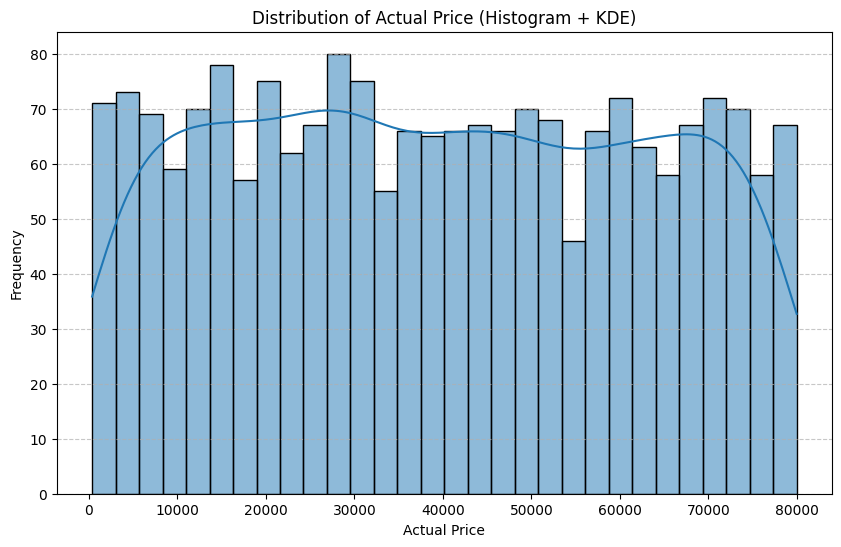

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.histplot(sample['actual_price'], kde=True, bins=30)
plt.title('Distribution of Actual Price (Histogram + KDE)')
plt.xlabel('Actual Price')
plt.ylabel('Frequency')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

### Relationship between price and rating → Scatter Plot

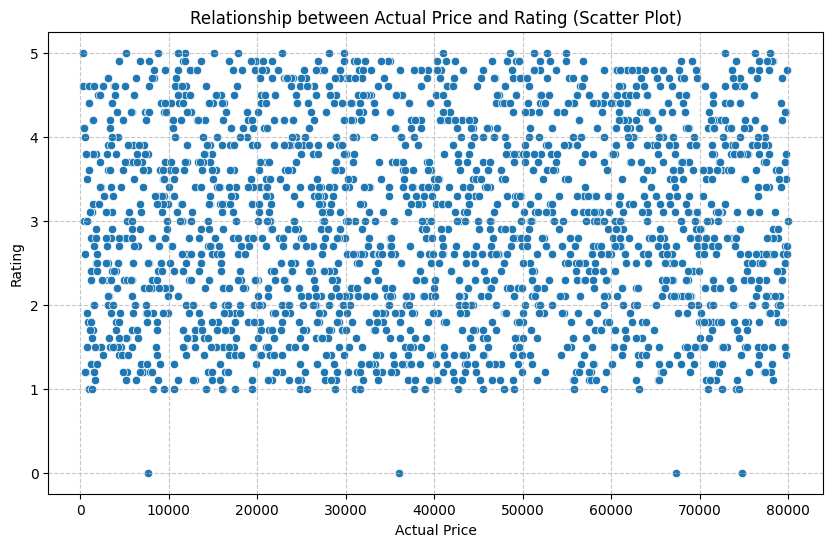

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='actual_price', y='rating', data=sample)
plt.title('Relationship between Actual Price and Rating (Scatter Plot)')
plt.xlabel('Actual Price')
plt.ylabel('Rating')
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

### Category-wise average rating → Bar Plot

/tmp/ipython-input-3564920967.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=average_rating_by_category.index, y=average_rating_by_category.values, palette='viridis')


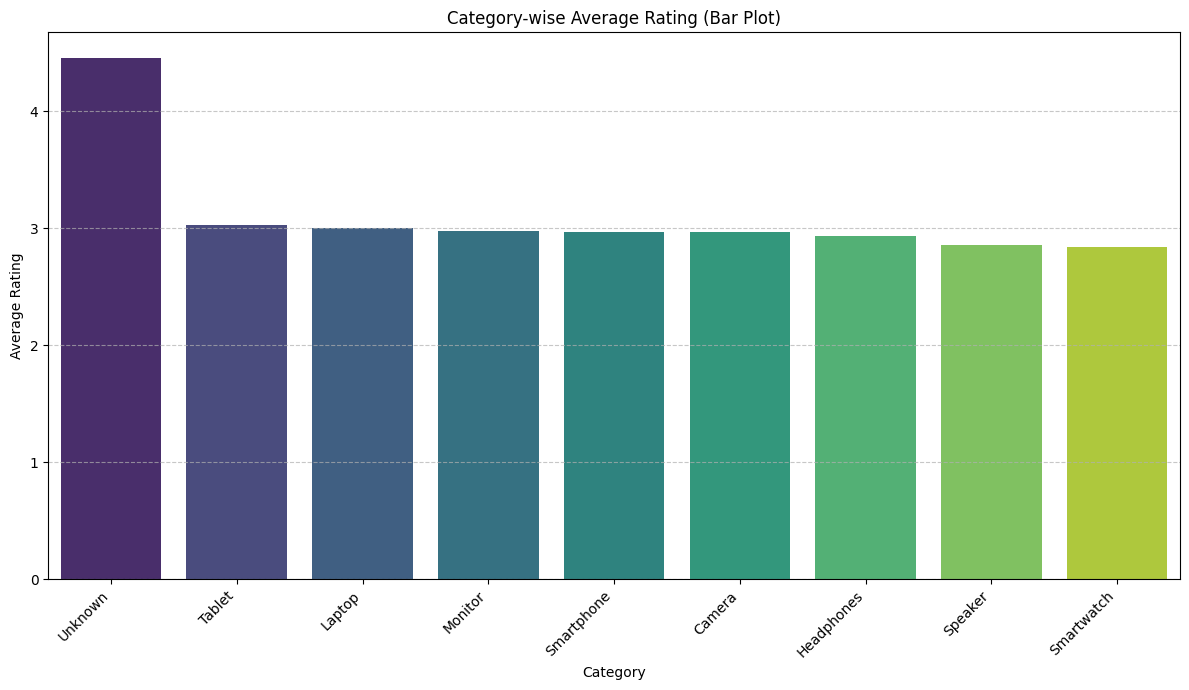

In [ ]:
average_rating_by_category = sample.groupby('category')['rating'].mean().sort_values(ascending=False)

plt.figure(figsize=(12, 7))
sns.barplot(x=average_rating_by_category.index, y=average_rating_by_category.values, palette='viridis')
plt.title('Category-wise Average Rating (Bar Plot)')
plt.xlabel('Category')
plt.ylabel('Average Rating')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

### Brand product count → Count Plot

/tmp/ipython-input-3446399924.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='brand', data=sample, order=sample['brand'].value_counts().index, palette='rocket')


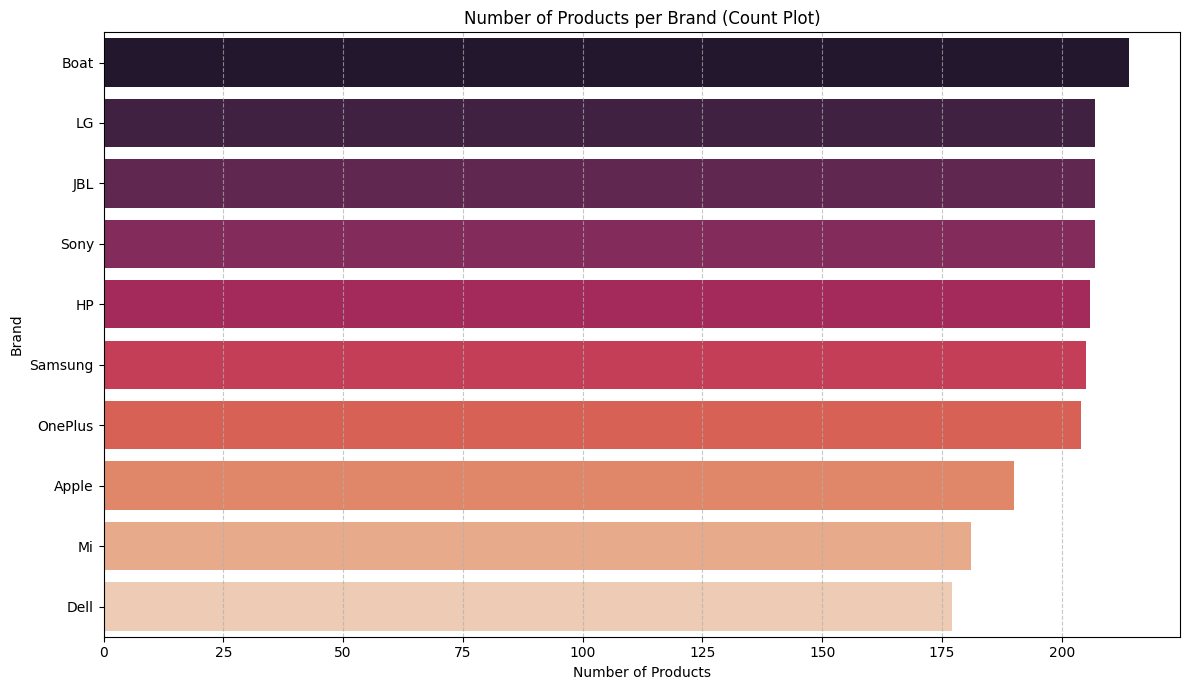

In [ ]:
plt.figure(figsize=(12, 7))
sns.countplot(y='brand', data=sample, order=sample['brand'].value_counts().index, palette='rocket')
plt.title('Number of Products per Brand (Count Plot)')
plt.xlabel('Number of Products')
plt.ylabel('Brand')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

### Numeric feature correlations → Heatmap

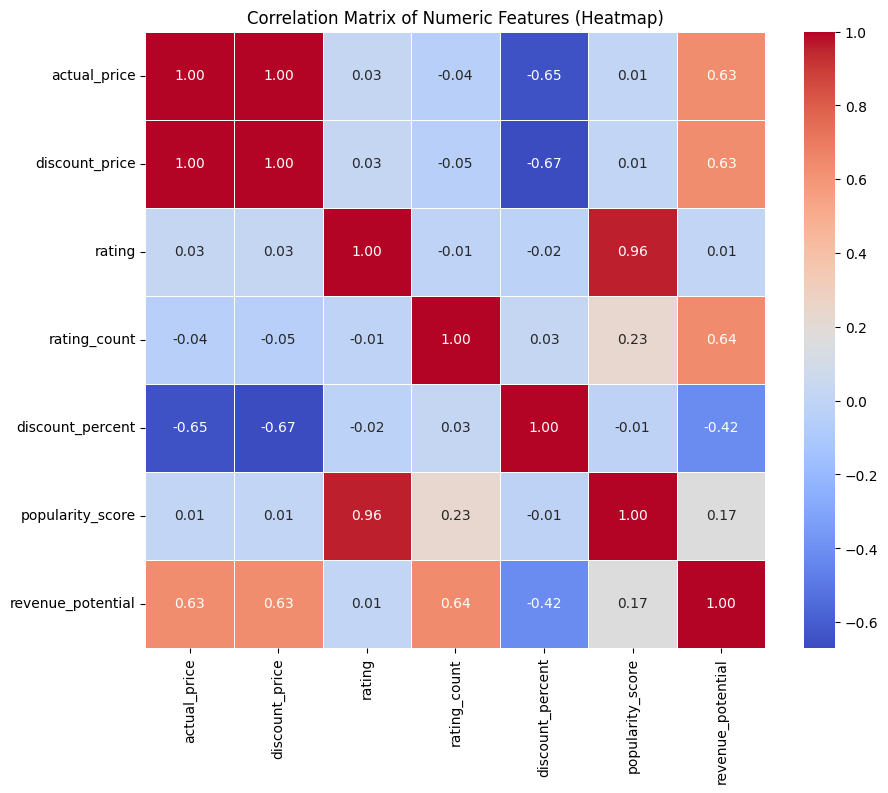

In [ ]:
numeric_cols = sample.select_dtypes(include=['float64', 'int64']).columns
correlation_matrix = sample[numeric_cols].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)
plt.title('Correlation Matrix of Numeric Features (Heatmap)')
plt.show()

Saving File into drive

In [ ]:
path='/content/drive/MyDrive/Colab Notebooks/Cleaned_Amazon_products_dataset.csv'
sample.to_csv(path,index=False)